<div style="text-align: center;">
    <img src="https://storage.googleapis.com/kaggle-media/competitions/The%20Learning%20Agency/LabLogo_Kaggle.png"  style="float: left; margin-right: 20px;">
</div>
<div style="text-align: center; margin-top: 120px;">
    <h1 style="font-size: 24px; font-weight: bold; color: orange;">Learning Agency Lab - Automated Essay Scoring 2.0</h1>
    <h2 style="font-size: 20px; font-weight: bold;">Solution by Daniil Bokhan</h2>
</div>


<div class="container">
    <h1>Competition Overview</h1>
    <p><strong>Goal:</strong> The goal of this competition is to train a model to score student essays. Your efforts are needed to reduce the high expense and time required to hand grade these essays.</p>
    <p><strong>Who's Interested:</strong> Participation in the competition is beneficial for educators and institutions, especially those in underserved communities, seeking reliable and timely feedback mechanisms for student writing.</p>
    <p><strong>Description:</strong> In the Learning Agency Lab - Automated Essay Scoring 2.0 competition, participants will work with the largest open-access writing dataset aligned to current standards for student-appropriate assessments. The aim is to create an open-source essay scoring algorithm that improves upon the original Automated Student Assessment Prize (ASAP) competition hosted in 2012. This competition seeks to provide real impact by easing the grading burden on teachers and offering students consistent feedback<p>
    <p><strong>Organizer:</strong> The competition is organized by Vanderbilt University, in partnership with The Learning Agency Lab, an Arizona-based independent nonprofit focused on developing learning-based tools for social good.</p>
    <p><strong>Why It Matters:</strong> Reliable automated essay scoring can revolutionize education by allowing more frequent use of essays in assessments. This can provide better insights into student learning and performance, particularly in underserved districts where grading resources are limited.</p>
    <p><strong>Timeline:</strong> The competition will run from April 3, 2024, to July 3, 2024.</p>
        <p></strong>Leaderboard Prizes</p></strong>
    <ul>
        <li>1st Place - $12,000</li>
        <li>2nd Place - $8,000</li>
        <li>3rd Place - $5,000</li>
    </ul>
    <p><strong>Efficiency Prizes</p></strong>
    <ul>
        <li>1st Place - $12,000</li>
        <li>2nd Place - $8,000</li>
        <li>3rd Place - $5,000</li>
    </ul>
    <p><strong>Acknowledgments:</strong> Vanderbilt University and the Learning Agency Lab extend their gratitude to the Bill & Melinda Gates Foundation, Schmidt Futures, and the Chan Zuckerberg Initiative for their support in making this competition possible.</p>
</div>
<hr>
<body>
    <h1>Competition Dataset Overview</h1>   
    <h2>Dataset Description</h2>
    <p>The competition dataset comprises approximately 24,000 argumentative essays written by students. Each essay has been scored on a holistic scale ranging from 1 to 6, based on a predefined scoring rubric.</p>  
    <h2>File and Field Information</h2> 
    <h3>train.csv - Training Data</h3>
    <ul>
        <li><strong>essay_id:</strong> Unique identifier for each essay.</li>
        <li><strong>full_text:</strong> The complete text of the essay.</li>
        <li><strong>score:</strong> Holistic score of the essay, ranging from 1 to 6.</li>
    </ul>
    <h3>test.csv - Test Data</h3>
    <ul>
        <li><strong>essay_id:</strong> Unique identifier for each essay.</li>
        <li><strong>full_text:</strong> The complete text of the essay.</li>
        <li><strong>score:</strong> Not included; used for predicting scores.</li>
    </ul>
    <h3>sample_submission.csv - Submission Format</h3>
    <ul>
        <li><strong>essay_id:</strong> Unique identifier for each essay.</li>
        <li><strong>score:</strong> Predicted holistic score of the essay, ranging from 1 to 6.</li>
    </ul>
</body>
<hr>
<body>
    <h2>Evaluation</h2>
    <p>Submissions are scored based on the quadratic weighted kappa, which measures the agreement between two outcomes. This metric typically varies from 0 (random agreement) to 1 (complete agreement). In the event that there is less agreement than expected by chance, the metric may go below 0.</p>
    <p>The quadratic weighted kappa is calculated as follows. First, an N x N histogram matrix O is constructed, such that O<sub>i,j</sub> corresponds to the number of essay_ids i (actual) that received a predicted value j. An N-by-N matrix of weights, w, is calculated based on the difference between actual and predicted values:</p>
    <p><code>w<sub>i,j</sub> = ((i - j)^2) / (N - 1)^2</code></p>
    <p>An N-by-N histogram matrix of expected outcomes, E, is calculated assuming that there is no correlation between values. This is calculated as the outer product between the actual histogram vector of outcomes and the predicted histogram vector, normalized such that E and O have the same sum.</p>
    <p>From these three matrices, the quadratic weighted kappa is calculated as:</p>
    <p><code>κ = 1 - (∑<sub>i,j</sub>w<sub>i,j</sub>O<sub>i,j</sub> / ∑<sub>i,j</sub>w<sub>i,j</sub>E<sub>i,j</sub>)</code></p>
</body>
<hr>
<body>
    <h2>Solution Approach</h2>
    <p>Our strategy is to find a solution that achieves a high score using models not constrained by Kaggle Notebooks limitations. Given that this is the second version of such a competition, we have a good understanding of how to proceed.</p>
    <p>With only 3 observations in the test dataset, our approach considers maximizing the metric score on the test data for the best public score, while also cross-validating on the training data (which is expected to lead to a better private leaderboard ranking).</p>
    <h3>Approach to Solution</h3>
    <p>The main approach to the solution is to use an ensemble of all possible bert models supported by Kaggle, drawn from the Feedback Prize - English Language Learning competition. We will utilize the ELLIPSE corpus dataset, which includes argumentative essays written by students studying English from 8th to 12th grades. Essays are assessed across six analytical criteria: cohesion, syntax, vocabulary, phraseology, grammar, and conventions.</p>
    <p>Each criterion represents a component of essay writing proficiency, where higher scores indicate higher mastery. Scores range from 1.0 to 5.0 in increments of 0.5. Some essays have already appeared in datasets from the Feedback Prize - Evaluating Student Writing and Feedback Prize - Predicting Effective Arguments competitions.</p>
    <p>We will use the following columns extracted from the data to evaluate our essays in this competition. After feature extraction from our texts, our task is to apply an ensemble of regressors to obtain an accurate final score (with lgbm and xgbm showing the best results).</p>
</body>
<body>
    <blockquote>
        <p>Note:</p>
        <p>We will not focus on the BERT models themselves and the final training data because I haven't reviewed them. Towards the end of the presentation, I have left all the references to all sources starting from the notebook with the training parameters to the fine-tunes and checkpoints.</p>
    </blockquote>
</body>

<h1>Base EDA</h1>

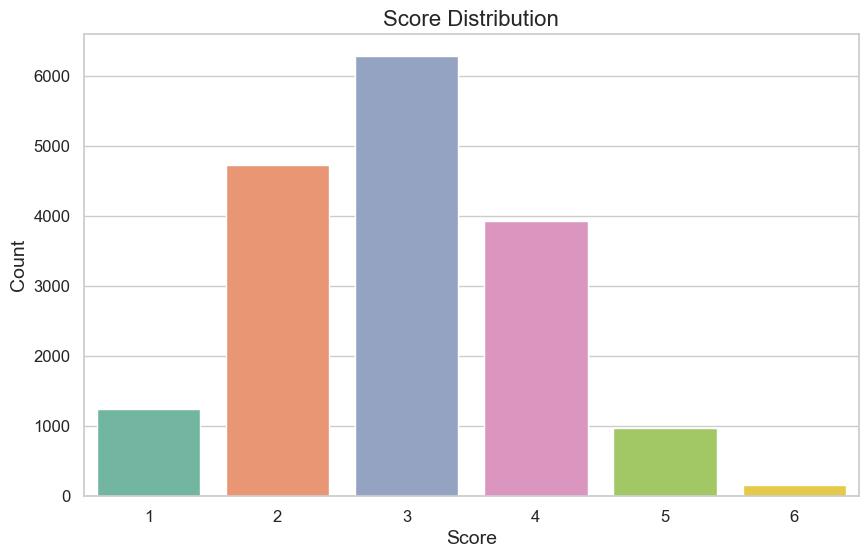

In [4]:
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=train, palette=palette)
plt.title('Score Distribution', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

c:\Users\Daniil Bokhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


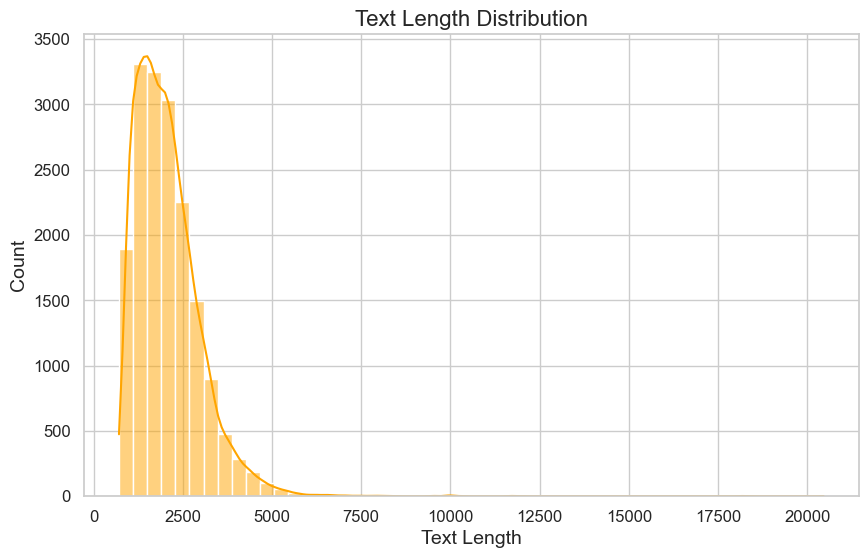

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(train['full_text'].apply(len), bins=50, kde=True, color='orange')
plt.title('Text Length Distribution', fontsize=16)
plt.xlabel('Text Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

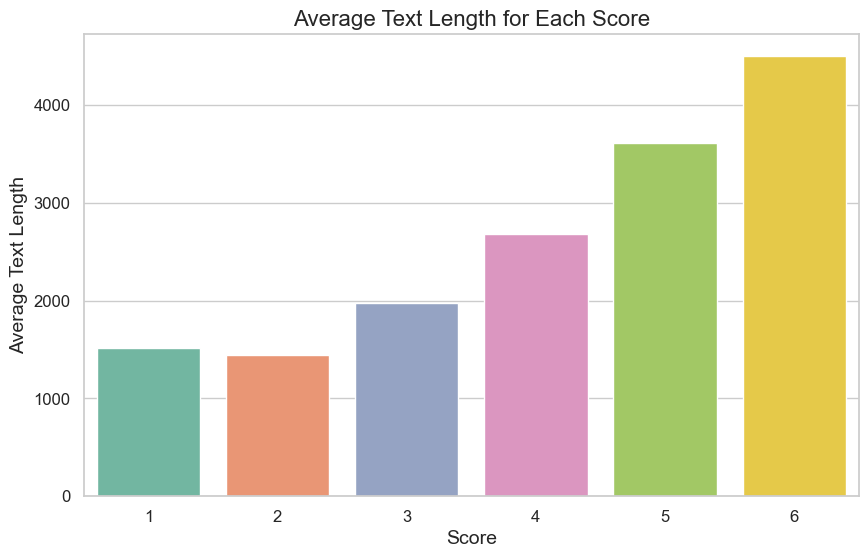

In [6]:
plt.figure(figsize=(10, 6))
mean_lengths = train.groupby('score')['full_text'].apply(lambda x: x.str.len().mean()).reset_index()
sns.barplot(x='score', y='full_text', data=mean_lengths, errorbar=None, palette=palette)
plt.title('Average Text Length for Each Score', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Average Text Length', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

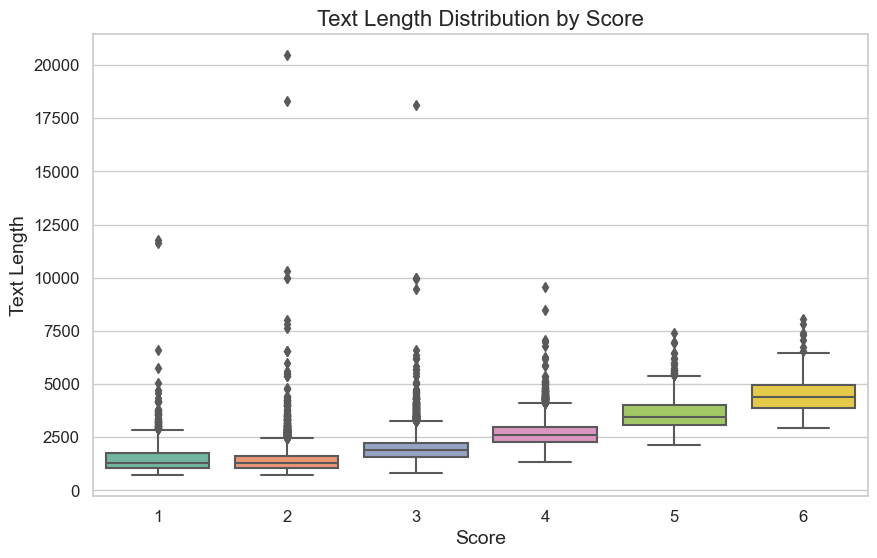

In [7]:
# Box plot of text length by score
plt.figure(figsize=(10, 6))
sns.boxplot(x='score', y=train['full_text'].apply(len), data=train, palette=palette)
plt.title('Text Length Distribution by Score', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Text Length', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

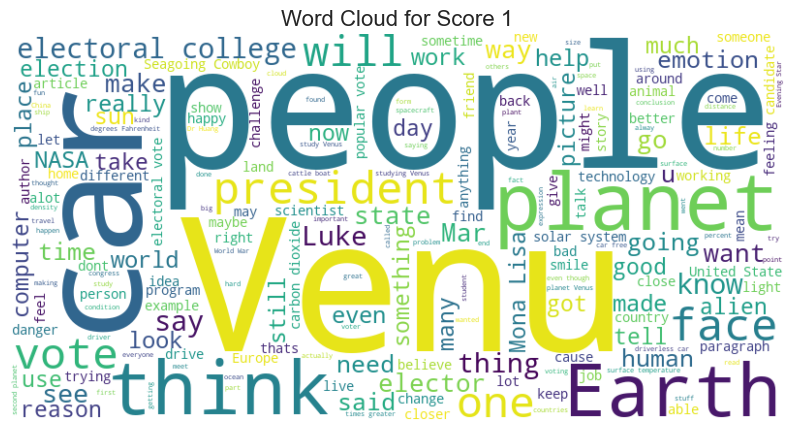

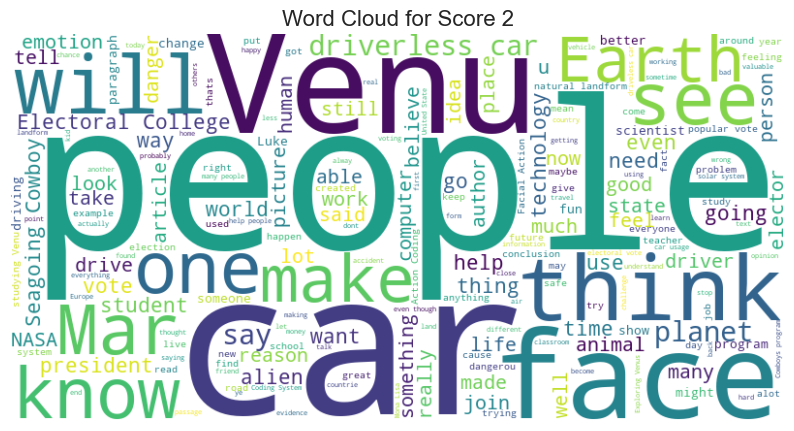

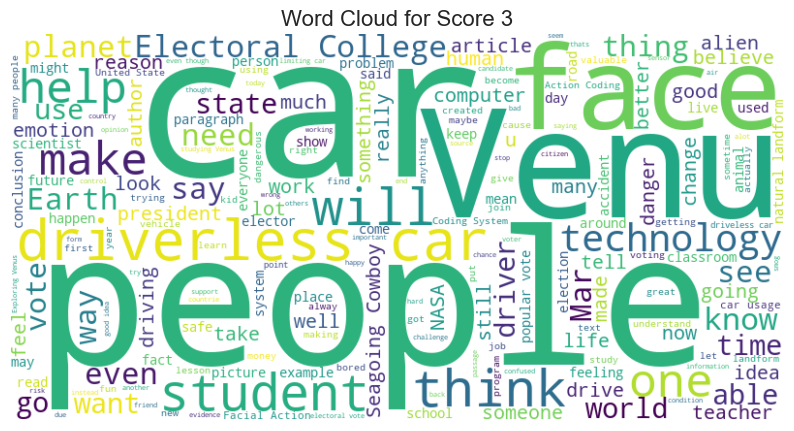

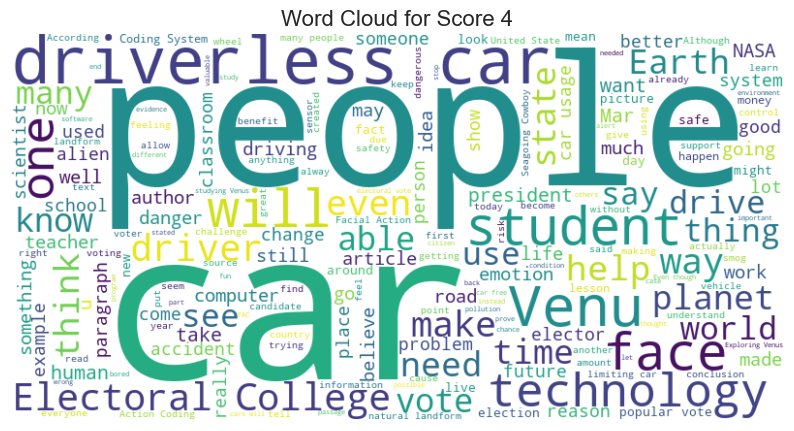

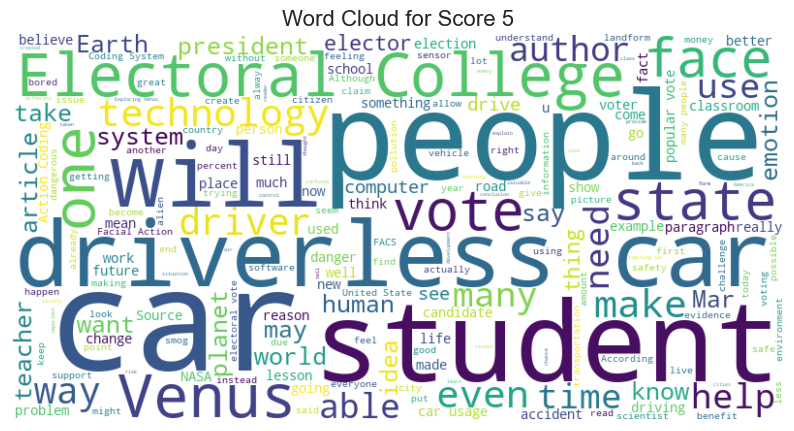

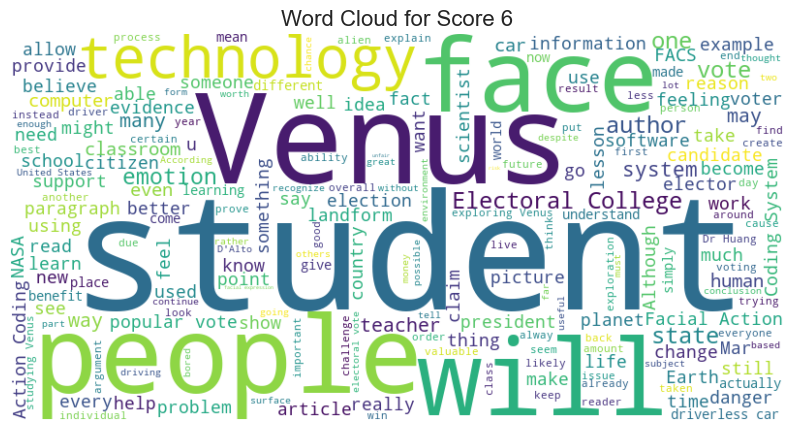

In [8]:
from wordcloud import WordCloud

def generate_wordcloud(text, score):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Score {score}', fontsize=16)
    plt.axis('off')
    plt.show()

for score in sorted(train['score'].unique()):
    score_text = train[train['score'] == score]['full_text']
    generate_wordcloud(score_text, score)

<hr>
<h1><strong>Solution</strong></h1>

In [ ]:
import xgboost as xgb  # importing xgboost for gradient boosting
import pandas as pd  # for handling data in DataFrames
import polars as pl  # another library for handling data in DataFrames
import spacy  # for natural language processing
import matplotlib.pyplot as plt  # for plotting graphs
import gc  # garbage collection
import torch  # for deep learning
import numpy as np  # for numerical operations
import re  # for regular expressions
import pickle  # for serialization
import lightgbm as lgb  # for gradient boosting
import joblib  # for loading and saving models
import optuna  # for hyperparameter optimization
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding  # for transformer models
from datasets import Dataset  # for handling datasets
from glob import glob  # for file pattern matching
from scipy.special import softmax  # for applying softmax function
from lightgbm import log_evaluation, early_stopping  # for LightGBM callbacks
from sklearn.metrics import f1_score, cohen_kappa_score  # for performance metrics
from sklearn.model_selection import StratifiedKFold,train_test_split  # for cross-validation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # for text vectorization
import fb3_deberta_family_inference_9_28_updated  # importing a method from another notebook with different BERT configs

max_len = 1024  # maximum length for tokenizer
batch_size = 1  # batch size for evaluation
TEST_DATA_PATH = "/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv"  # path to test data
MODEL_PATH = '/kaggle/input/aes2-400-20240419134941/*/*'  #5-fold DeBERTa with checkpoints from another notebook


def get_deberta_predicted_score(df_test):
    models = glob(MODEL_PATH)  # get all model paths
    tokenizer = AutoTokenizer.from_pretrained(models[0])  # load tokenizer from the first model

    def tokenize(sample):
        return tokenizer(sample['full_text'], max_length=max_len, truncation=True)  # tokenize text samples

    df_test = pd.read_csv(TEST_DATA_PATH)  # read test data
    ds = Dataset.from_pandas(df_test).map(tokenize).remove_columns(['essay_id', 'full_text'])  # preprocess and convert to dataset

    args = TrainingArguments(
        ".", 
        per_device_eval_batch_size=batch_size, 
        report_to="none"  # set up training arguments
    )

    predictions = []
    for model in models:
        model = AutoModelForSequenceClassification.from_pretrained(model)  # load each model
        trainer = Trainer(
            model=model, 
            args=args, 
            data_collator=DataCollatorWithPadding(tokenizer), 
            tokenizer=tokenizer
        )

        preds = trainer.predict(ds).predictions  # get model predictions
        predictions.append(softmax(preds, axis=-1))  # apply softmax to get probabilities
        del model, trainer  # clean up
        torch.cuda.empty_cache()  # free up GPU memory
        gc.collect()  # run garbage collection

    predicted_score = 0.

    for p in predictions:
        predicted_score += p  # aggregate predictions

    predicted_score /= len(predictions)  # average predictions

    return predicted_score  # return the predicted scores


In [ ]:
def get_fb3_predicted(df_test):
    """
    This is a method imported from another notebook with configurations for various BERT variations.
    """
    # Rename the 'essay_id' column to 'text_id' as required by the model for prediction
    fb3_predicted = fb3_deberta_family_inference_9_28_updated.predict(
        df_test.rename(columns={"essay_id": "text_id"})  # Ensure the column name matches the model's expected input
    )
    
    return fb3_predicted  # Return the predictions generated by the model


In [ ]:
PATH = "/kaggle/input/learning-agency-lab-automated-essay-scoring-2/"  # Path to the dataset

# Load the spaCy English language model
nlp = spacy.load('en_core_web_sm')
# Create a set of English vocabulary words with pre-trained vectors
english_vocab = set(token.text.lower() for token in nlp.vocab if token.has_vector)

def dataPreprocessing(x):
    x = x.lower()  # Convert text to lowercase
    x = re.sub(r'<.*?>', '', x)  # Remove HTML tags
    x = re.sub(r'@\w+', '', x)  # Remove mentions (e.g., @username)
    x = re.sub(r'\d+', '', x)  # Remove digits
    x = re.sub(r'http\w+', '', x)  # Remove URLs
    x = re.sub(r'\s+', ' ', x)  # Replace multiple whitespace characters with a single space
    x = re.sub(r'\.+', '.', x)  # Replace multiple dots with a single dot
    x = re.sub(r'\,+', ',', x)  # Replace multiple commas with a single comma
    x = x.strip()  # Remove leading and trailing whitespace
    return x

def count_spelling_errors(text):
    doc = nlp(text)  # Process text with spaCy
    lemmatized_tokens = [token.lemma_.lower() for token in doc]  # Lemmatize and lowercase tokens
    # Count tokens not in the English vocabulary set
    return sum(1 for token in lemmatized_tokens if token not in english_vocab)

def Paragraph_Preprocess(tmp):
    tmp = tmp.explode('paragraph')  # Explode the 'paragraph' column to separate paragraphs
    # Apply data preprocessing to each paragraph
    tmp = tmp.with_columns(pl.col('paragraph').map_elements(dataPreprocessing))
    # Compute the length of each paragraph
    tmp = tmp.with_columns(pl.col('paragraph').map_elements(lambda x: len(x)).alias("paragraph_len"))
    # Compute the number of sentences in each paragraph
    tmp = tmp.with_columns(pl.col('paragraph').map_elements(lambda x: len(x.split('.'))).alias("paragraph_sentence_cnt"))
    # Compute the number of words in each paragraph
    tmp = tmp.with_columns(pl.col('paragraph').map_elements(lambda x: len(x.split(' '))).alias("paragraph_word_cnt"))
    return tmp

def Paragraph_Eng(tmp):
    num_list = [0, 50, 75, 100, 125, 150, 175, 200, 250, 300, 350, 400, 500, 600]
    aggs = [
        *[pl.col('paragraph').filter(pl.col('paragraph_len') >= i).count().alias(f"paragraph_{i}_cnt") for i in num_list],
        *[pl.col('paragraph').filter(pl.col('paragraph_len') <= i).count().alias(f"paragraph_{i}_cnt") for i in [25, 49]],
        *[pl.col(fea).max().alias(f"{fea}_max") for fea in ["paragraph_len", "paragraph_sentence_cnt", "paragraph_word_cnt"]],
        *[pl.col(fea).mean().alias(f"{fea}_mean") for fea in ["paragraph_len", "paragraph_sentence_cnt", "paragraph_word_cnt"]],
        *[pl.col(fea).min().alias(f"{fea}_min") for fea in ["paragraph_len", "paragraph_sentence_cnt", "paragraph_word_cnt"]],
        *[pl.col(fea).sum().alias(f"{fea}_sum") for fea in ["paragraph_len", "paragraph_sentence_cnt", "paragraph_word_cnt"]],
        *[pl.col(fea).first().alias(f"{fea}_first") for fea in ["paragraph_len", "paragraph_sentence_cnt", "paragraph_word_cnt"]],
        *[pl.col(fea).last().alias(f"{fea}_last") for fea in ["paragraph_len", "paragraph_sentence_cnt", "paragraph_word_cnt"]],
        *[pl.col(fea).kurtosis().alias(f"{fea}_kurtosis") for fea in ["paragraph_len", "paragraph_sentence_cnt", "paragraph_word_cnt"]],
        *[pl.col(fea).quantile(0.25).alias(f"{fea}_q1") for fea in ["paragraph_len", "paragraph_sentence_cnt", "paragraph_word_cnt"]],
        *[pl.col(fea).quantile(0.75).alias(f"{fea}_q3") for fea in ["paragraph_len", "paragraph_sentence_cnt", "paragraph_word_cnt"]],
    ]
    df = tmp.group_by(['essay_id'], maintain_order=True).agg(aggs).sort("essay_id")  # Aggregate features for each essay
    return df.to_pandas()  # Convert the result to a pandas DataFrame

def Sentence_Preprocess(tmp):
    tmp = tmp.with_columns(pl.col('full_text').map_elements(dataPreprocessing).str.split(by=".").alias("sentence"))  # Split text into sentences
    tmp = tmp.explode('sentence')  # Explode the 'sentence' column to separate sentences
    tmp = tmp.with_columns(pl.col('sentence').map_elements(lambda x: len(x)).alias("sentence_len"))  # Compute the length of each sentence
    tmp = tmp.filter(pl.col('sentence_len') >= 15)  # Filter sentences that are at least 15 characters long
    tmp = tmp.with_columns(pl.col('sentence').map_elements(lambda x: len(x.split(' '))).alias("sentence_word_cnt"))  # Compute the number of words in each sentence
    return tmp

def Sentence_Eng(tmp):
    aggs = [
        *[pl.col('sentence').filter(pl.col('sentence_len') >= i).count().alias(f"sentence_{i}_cnt") for i in [0, 15, 50, 100, 150, 200, 250, 300]],
        *[pl.col('sentence').filter(pl.col('sentence_len') <= i).count().alias(f"sentence_<15_cnt") for i in [15, 50]],
        *[pl.col(fea).max().alias(f"{fea}_max") for fea in ["sentence_len", "sentence_word_cnt"]],
        *[pl.col(fea).mean().alias(f"{fea}_mean") for fea in ["sentence_len", "sentence_word_cnt"]],
        *[pl.col(fea).min().alias(f"{fea}_min") for fea in ["sentence_len", "sentence_word_cnt"]],
        *[pl.col(fea).sum().alias(f"{fea}_sum") for fea in ["sentence_len", "sentence_word_cnt"]],
        *[pl.col(fea).first().alias(f"{fea}_first") for fea in ["sentence_len", "sentence_word_cnt"]],
        *[pl.col(fea).last().alias(f"{fea}_last") for fea in ["sentence_len", "sentence_word_cnt"]],
        *[pl.col(fea).kurtosis().alias(f"{fea}_kurtosis") for fea in ["sentence_len", "sentence_word_cnt"]],
        *[pl.col(fea).quantile(0.25).alias(f"{fea}_q1") for fea in ["sentence_len", "sentence_word_cnt"]],
        *[pl.col(fea).quantile(0.75).alias(f"{fea}_q3") for fea in ["sentence_len", "sentence_word_cnt"]],
    ]
    df = tmp.group_by(['essay_id'], maintain_order=True).agg(aggs).sort("essay_id")  # Aggregate features for each essay
    return df.to_pandas()  # Convert the result to a pandas DataFrame

def Word_Preprocess(tmp):
    tmp = tmp.with_columns(pl.col('full_text').map_elements(dataPreprocessing).str.split(by=" ").alias("word"))  # Split text into words
    tmp = tmp.explode('word')  # Explode the 'word' column to separate words
    tmp = tmp.with_columns(pl.col('word').map_elements(lambda x: len(x)).alias("word_len"))  # Compute the length of each word
    tmp = tmp.filter(pl.col('word_len') != 0)  # Filter out empty words
    return tmp

def Word_Eng(tmp):
    aggs = [
        *[pl.col('word').filter(pl.col('word_len') >= i+1).count().alias(f"word_{i+1}_cnt") for i in range(15)],
        pl.col('word_len').max().alias(f"word_len_max"),
        pl.col('word_len').mean().alias(f"word_len_mean"),
        pl.col('word_len').std().alias(f"word_len_std"),
        pl.col('word_len').quantile(0.25).alias(f"word_len_q1"),
        pl.col('word_len').quantile(0.50).alias(f"word_len_q2"),
        pl.col('word_len').quantile(0.75).alias(f"word_len_q3"),
    ]
    df = tmp.group_by(['essay_id'], maintain_order=True).agg(aggs).sort("essay_id")  # Aggregate features for each essay
    return df.to_pandas()  # Convert the result to a pandas DataFrame

# Read the training data from CSV and split the 'full_text' into paragraphs
train = pl.read_csv(PATH + "train.csv").with_columns([
    pl.col("full_text").str.split(by="\n\n").alias("paragraph")
])
# Create features for training data
tmp = Paragraph_Preprocess(train)  # Process paragraphs
train_feats = Paragraph_Eng(tmp)  # Aggregate paragraph features

tmp = Sentence_Preprocess(train)  # Process sentences
train_feats = train_feats.merge(Sentence_Eng(tmp), on='essay_id', how='left')  # Merge sentence features

tmp = Word_Preprocess(train)  # Process words
train_feats = train_feats.merge(Word_Eng(tmp), on='essay_id', how='left')  # Merge word features

In [ ]:
# Initialize the TF-IDF vectorizer with specified parameters
vectorizer_tfidf = TfidfVectorizer(
    analyzer='word',  # Use words as features
    ngram_range=(1, 2),  # Use unigrams and bigrams
    min_df=0.05,  # Ignore terms that appear in less than 5% of the documents
    max_df=0.95,  # Ignore terms that appear in more than 95% of the documents
    norm='l2',  # Normalize the term frequencies by L2 norm
)

# Apply the TF-IDF vectorizer to the 'full_text' column of the training data
train_tfidf = vectorizer_tfidf.fit_transform(train['full_text'])

# Convert the TF-IDF matrix to a DataFrame with appropriate column names
tfidf_df = pd.DataFrame(
    train_tfidf.toarray(),  # Convert sparse matrix to dense array
    columns=[f'tfidf_{i}' for i in range(train_tfidf.shape[1])]  # Column names based on the number of features
)

# Join the TF-IDF DataFrame to the existing training features DataFrame
train_feats = train_feats.join(tfidf_df)

# Initialize the Count vectorizer with specified parameters
vectorizer_cnt = CountVectorizer(
    analyzer='word',  # Use words as features
    ngram_range=(3, 6),  # Use trigrams to six-grams
    min_df=0.05,  # Ignore terms that appear in less than 5% of the documents
    max_df=0.95,  # Ignore terms that appear in more than 95% of the documents
)

# Apply the Count vectorizer to the 'full_text' column of the training data
train_cnt = vectorizer_cnt.fit_transform(train['full_text'])

# Convert the Count matrix to a DataFrame with appropriate column names
cnt_df = pd.DataFrame(
    train_cnt.toarray(),  # Convert sparse matrix to dense array
    columns=[f'cnt_{i}' for i in range(train_cnt.shape[1])]  # Column names based on the number of features
)

# Join the Count DataFrame to the existing training features DataFrame
train_feats = train_feats.join(cnt_df)


In [ ]:
# Load the out-of-fold predictions for the DeBERTa model from a pickle file
deberta_oof = joblib.load('/kaggle/input/aes2-400-20240419134941/oof.pkl')

# Print the shape of the loaded out-of-fold predictions and the training features
print(deberta_oof.shape, train_feats.shape)

# Add each of the 6 DeBERTa out-of-fold prediction columns to the training features DataFrame
for i in range(6):
    train_feats[f'deberta_oof_{i}'] = deberta_oof[:, i]

# Update the feature names list to include all columns except 'essay_id' and 'score'
feature_names = list(filter(lambda x: x not in ['essay_id', 'score'], train_feats.columns))


In [ ]:
# Read out-of-fold predictions from a CSV file
fb_oof = pd.read_csv("/kaggle/usr/lib/fb3_deberta_family_inference_9_28_updated/submission.csv")

# Merge the out-of-fold predictions with the existing training features
train_feats = pd.merge(
    train_feats,  # Existing training features
    fb_oof,  # Out-of-fold predictions
    left_on="essay_id",  # Join on 'essay_id' from training features
    right_on="text_id"  # Join on 'text_id' from out-of-fold predictions
).drop("text_id", axis=1)  # Drop the 'text_id' column after merging

# Update the list of feature names with the new columns from out-of-fold predictions
feature_names += list(fb_oof.columns.drop("text_id"))

# Define the number of splits for cross-validation
n_splits = 15

# Initialize lists to store models, predictions, and scores
models = []
predictions = []
f1_scores = []
kappa_scores = []

def quadratic_weighted_kappa(y_true, y_pred):

    if isinstance(y_pred, xgb.QuantileDMatrix):
        # Handle predictions from XGBoost
        y_true, y_pred = y_pred, y_true  # Swap y_true and y_pred

        y_true = (y_true.get_label() + a).round()  # Adjust and round true labels
        y_pred = (y_pred + a).clip(1, 6).round()  # Adjust, clip, and round predicted labels
        qwk = cohen_kappa_score(y_true, y_pred, weights="quadratic")  # Calculate kappa score
        return 'QWK', qwk  # Return the metric name and kappa score

    else:
        # Handle predictions from LightGBM
        y_true = y_true + a  # Adjust true labels
        y_pred = (y_pred + a).clip(1, 6).round()  # Adjust, clip, and round predicted labels
        qwk = cohen_kappa_score(y_true, y_pred, weights="quadratic")  # Calculate kappa score
        return 'QWK', qwk, True  # Return the metric name, kappa score, and a flag

def qwk_obj(y_true, y_pred):

    labels = y_true + a  # Adjust true labels
    preds = y_pred + a  # Adjust predicted labels
    preds = preds.clip(1, 6)  # Clip predicted values to the range [1, 6]
    
    # Compute quadratic weighted kappa loss components
    f = 1/2*np.sum((preds-labels)**2)  # Loss based on predictions and true labels
    g = 1/2*np.sum((preds-a)**2+b)  # Loss based on predictions and mean
    df = preds - labels  # Difference between predictions and true labels
    dg = preds - a  # Difference between predictions and mean
    
    # Compute gradient and Hessian
    grad = (df/g - f*dg/g**2)*len(labels)
    hess = np.ones(len(labels))
    return grad, hess  # Return gradients and Hessians

# Define constants for adjusting predictions
a = 2.998
b = 1.092

# Convert features to a numpy array of type float32
X = train_feats[feature_names].astype(np.float32).values

# Convert scores to integer type for the target variable
y_split = train_feats['score'].astype(int).values

# Convert scores to float32 type and adjust by subtracting 'a'
y = train_feats['score'].astype(np.float32).values - a


In [ ]:
def feature_select_wrapper():
    
    # Define features to be used for feature selection
    features = feature_names

    # Initialize StratifiedKFold with 5 splits and shuffling
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Initialize a Series to keep track of feature importance scores
    fse = pd.Series(0, index=features)
         
    # Loop through each fold of the cross-validation
    for train_index, test_index in skf.split(X, y_split):

        # Split data into training and test sets for this fold
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold, y_test_fold_int = y[train_index], y[test_index], y_split[test_index]

        # Initialize LightGBM model with specified hyperparameters
        model = lgb.LGBMRegressor(
            objective = qwk_obj,  # Custom objective function
            metrics = 'None',  # No metrics during training
            learning_rate = 0.05,  # Learning rate
            max_depth = 5,  # Maximum depth of trees
            num_leaves = 10,  # Number of leaves in trees
            colsample_bytree=0.3,  # Fraction of features used for each tree
            reg_alpha = 0.7,  # L1 regularization
            reg_lambda = 0.1,  # L2 regularization
            n_estimators=700,  # Number of trees
            random_state=42,  # Random seed
            extra_trees=True,  # Use extra trees
            class_weight='balanced',  # Balance class weights
            verbosity = -1  # Suppress output
        )

        # Fit the model on the training data
        predictor = model.fit(
            X_train_fold,
            y_train_fold,
            eval_names=['train', 'valid'],  # Names for training and validation sets
            eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],  # Evaluation sets
            eval_metric=quadratic_weighted_kappa,  # Evaluation metric
            callbacks=callbacks  # Callbacks for logging and early stopping
        )
        
        # Append the trained model to the models list
        models.append(predictor)
        
        # Make predictions on the test set for this fold
        predictions_fold = predictor.predict(X_test_fold)
        
        # Adjust predictions and clip values to the range [1, 6]
        predictions_fold = predictions_fold + a
        predictions_fold = predictions_fold.clip(1, 6).round()
        
        # Append predictions to the predictions list
        predictions.append(predictions_fold)
        
        # Calculate and append F1 score for this fold
        f1_fold = f1_score(y_test_fold_int, predictions_fold, average='weighted')
        f1_scores.append(f1_fold)

        # Calculate and append Cohen's Kappa score for this fold
        kappa_fold = cohen_kappa_score(y_test_fold_int, predictions_fold, weights='quadratic')
        kappa_scores.append(kappa_fold)

        # Print F1 and Cohen's Kappa scores for this fold
        print(f'F1 score across fold: {f1_fold}')
        print(f'Cohen kappa score across fold: {kappa_fold}')

        # Update feature importance scores
        fse += pd.Series(predictor.feature_importances_, features)
    
    # Sort features by their importance scores and select the top 13,000 features
    feature_select = fse.sort_values(ascending=False).index.tolist()[:13000]
    print('done')  # Print a message indicating completion of the function
    
    return feature_select  # Return the list of selected features

# Initialize lists to store scores, models, and predictions
f1_scores = []
kappa_scores = []
models = []
predictions = []

# Define callbacks for LightGBM model training
callbacks = [log_evaluation(period=25), early_stopping(stopping_rounds=75, first_metric_only=True)]

# Call the feature selection wrapper function
feature_select = feature_select_wrapper()


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_split,  # features and target
    test_size=0.2,  # proportion of the data to include in the test split
    random_state=42,  # seed for random number generator
    stratify=y_split  # ensure the split preserves the percentage of samples for each class
)

def objective(trial, X_train, X_val, y_train, y_val):
    # Define hyperparameters to tune
    param = {
        "objective": qwk_obj,  # custom objective function for LightGBM
        "metric": "None",  # no metrics during training
        "verbosity": -1,  # suppress output
        "boosting_type": "gbdt",  # gradient boosting decision tree
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),  # learning rate with log uniform distribution
        "max_depth": trial.suggest_int("max_depth", 4, 15),  # maximum depth of trees
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.6, 1.0),  # fraction of features used for each tree
        "n_estimators": trial.suggest_int("n_estimators", 400, 1100),  # number of trees
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 5)  # L2 regularization with log uniform distribution
    }

    # Initialize LightGBM model with suggested parameters
    model = lgb.LGBMRegressor(**param)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    preds = model.predict(X_val)
    
    # Calculate the quadratic weighted kappa score
    kappa = quadratic_weighted_kappa(y_val, preds)
    return kappa  # return the kappa score as the objective metric

# Initialize the TPE sampler for efficient hyperparameter optimization
sampler = optuna.samplers.TPESampler(seed=42)

# Create a study object to conduct hyperparameter optimization
study = optuna.create_study(direction="maximize", sampler=sampler)  # maximize the objective metric

# Optimize the study by passing the objective function and specifying the number of trials
study.optimize(lambda trial: objective(trial, X_train, X_test, y_train, y_test), n_trials=500)

# Retrieve and print the best hyperparameters found
best_params = study.best_params
print('='*50)  # print a separator line
print("best params:")  # print the best parameters


In [ ]:
class Predictor:
    def __init__(self, models: list, n: float = 0.746):
        self.models = models  # store list of models
        self.n = n  # store weight parameter

    def predict(self, X):
        n_models = len(self.models)  # number of models
        predicted = None  # initialize predicted variable
        n = self.n  # retrieve weight parameter
        for i, model in enumerate(self.models):  # iterate through models
            if i == 0:
                predicted = n * model.predict(X)  # initialize with weighted prediction of the first model
            else:
                predicted += (1 - n) * model.predict(X)  # accumulate weighted predictions of subsequent models
        return predicted  # return the final aggregated prediction

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)  # stratified K-fold cross-validation
xgboost_best_iters = []  # list to store best iterations of XGBoost models
light_best_iters = []  # list to store best iterations of LightGBM models

# Initialize out-of-fold predictions array
oof = np.zeros(len(train), dtype='float32')  # array for storing out-of-fold predictions

for i, (train_index, test_index) in enumerate(skf.split(X, y_split), 1):
    # Split the data into training and testing sets for this fold
    print('fold', i)  # print the current fold number
    X_train_fold, X_test_fold = X[train_index], X[test_index]  # split features
    y_train_fold, y_test_fold, y_test_fold_int = y[train_index], y[test_index], y_split[test_index]  # split targets
    callbacks = [log_evaluation(period=25), first_metric_only=True)]  # define callbacks for training

    # Initialize and fit LightGBM model
    light = lgb.LGBMRegressor(
        objective=qwk_obj,  # custom objective function
        metrics='None',  # no metrics during training
        learning_rate=0.07958485700065134,  # learning rate
        max_depth=8,  # maximum depth of trees
        num_leaves=10,  # number of leaves in each tree
        colsample_bytree=0.3,  # fraction of features used for each tree
        reg_alpha=0.7,  # L1 regularization
        reg_lambda=0.15478658759914005,  # L2 regularization
        n_estimators=1053,  # number of trees
        random_state=42,  # seed for reproducibility
        extra_trees=True,  # use extra trees
        class_weight='balanced',  # balance weights for classes
        device='gpu',  # use GPU for training
        verbosity=-1,  # suppress output
    )

    # Fit the LightGBM model
    light.fit(
        X_train_fold,
        y_train_fold,
        eval_names=['train', 'valid'],
        eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
        eval_metric=quadratic_weighted_kappa,  # evaluation metric
        callbacks=callbacks  # callbacks for training
    )
    light_best_iters.append(light.best_iteration_)  # store best iteration
    print(f"Light best iter: {light.best_iteration_}")  # print best iteration for LightGBM

    # Initialize and fit XGBoost model
    xgb_regressor = xgb.XGBRegressor(
        objective=qwk_obj,  # custom objective function
        verbosity=0,  # suppress output
        metrics='None',  # no metrics during training
        learning_rate=0.1,  # learning rate
        max_depth=8,  # maximum depth of trees
        num_leaves=10,  # number of leaves in each tree
        colsample_bytree=0.5,  # fraction of features used for each tree
        reg_alpha=0.1,  # L1 regularization
        reg_lambda=1.6,  # L2 regularization
        n_estimators=1024,  # number of trees
        random_state=42,  # seed for reproducibility
        extra_trees=True,  # use extra trees
        scale_pos_weight=100,  # scale weight for positive class
        class_weight='balanced',  # balance weights for classes
        tree_method="hist",  # use histogram-based algorithm
        device="gpu"  # use GPU for training
    )

    # Define callbacks for XGBoost
    xgb_callbacks = [
        xgb.callback.EvaluationMonitor(period=25),  # monitor evaluation every 25 iterations
        xgb.callback.EarlyStopping(200, metric_name="QWK", maximize=True, save_best=True, data_name="validation_1")  # early stopping
    ]

    # Fit the XGBoost model
    xgb_regressor.fit(
        X_train_fold,
        y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
        eval_metric=quadratic_weighted_kappa,  # evaluation metric
        callbacks=xgb_callbacks  # callbacks for training
    )
    print(f"XGBoost best iter: {xgb_regressor.get_booster().best_iteration}")  # print best iteration for XGBoost
    xgboost_best_iters.append(xgb_regressor.get_booster().best_iteration)  # store best iteration

    # Create and add Predictor instance
    predictor = Predictor([light, xgb_regressor], n=0.709)  # initialize predictor with models and weight

    models.append(predictor)  # add predictor to models list

    # Make predictions and update out-of-fold predictions
    predictions_fold = predictor.predict(X_test_fold)  # get predictions from predictor
    predictions_fold = predictions_fold + a  # adjust predictions with constant 'a'
    oof[test_index] = predictions_fold  # store predictions
    predictions_fold = predictions_fold.clip(1, 6).round()  # clip and round predictions
    predictions.append(predictions_fold)  # store predictions for current fold

    # Calculate and store F1 and Kappa scores
    f1_fold = f1_score(y_test_fold_int, predictions_fold, average='weighted')  # calculate F1 score
    f1_scores.append(f1_fold)  # store F1 score

    kappa_fold = cohen_kappa_score(y_test_fold_int, predictions_fold, weights='quadratic')  # calculate Cohen's Kappa score
    kappa_scores.append(kappa_fold)  # store Kappa score

    print(f'F1 score across fold: {f1_fold}')  # print F1 score
    print(f'Cohen kappa score across fold: {kappa_fold}')  # print Kappa score

    gc.collect()  # perform garbage collection

# Define function to find optimal thresholds
def find_thresholds(true, pred, steps=50):
    xs = [[], [], [], [], []]  # list to store threshold values
    ys = [[], [], [], [], []]  # list to store metric values

    # COMPUTE BASELINE METRIC
    threshold = [1.5, 2.5, 3.5, 4.5, 5.5]  # initial thresholds
    pred2 = pd.cut(pred, [-np.inf] + threshold + [np.inf], 
                    labels=[1, 2, 3, 4, 5, 6]).astype('int32')  # apply initial thresholds
    best = cohen_kappa_score(true, pred2, weights="quadratic")  # compute baseline metric

    # FIND FIVE OPTIMAL THRESHOLDS
    for k in range(5):
        for sign in [1, -1]:
            v = threshold[k]
            threshold2 = threshold.copy()
            stop = 0
            while stop < steps:
                # TRY NEW THRESHOLD
                v += sign * 0.01
                threshold2[k] = v
                pred2 = pd.cut(pred, [-np.inf] + threshold2 + [np.inf], 
                                labels=[1, 2, 3, 4, 5, 6]).astype('int32')  # apply new thresholds
                metric = cohen_kappa_score(true, pred2, weights="quadratic")  # compute metric

                # SAVE TRIALS FOR PLOTTING
                xs[k].append(v)
                ys[k].append(metric)

                # EARLY STOPPING
                if metric <= best:
                    stop += 1
                else:
                    stop = 0
                    best = metric
                    threshold = threshold2.copy()

    # COMPUTE FINAL METRIC
    pred2 = pd.cut(pred, [-np.inf] + threshold + [np.inf], 
                    labels=[1, 2, 3, 4, 5, 6]).astype('int32')  # apply final thresholds
    best = cohen_kappa_score(true, pred2, weights="quadratic")  # compute final metric

    # RETURN RESULTS
    threshold = [np.round(t, 3) for t in threshold]  # round thresholds
    return best, threshold, xs, ys  # return best metric, thresholds, and trial data

# Initialize thresholds
thresholds = [1.51, 2.6, 3.5, 4.59, 5.56]  # predefined thresholds

# Calculate and print mean scores
mean_f1_score = np.mean(f1_scores)  # mean F1 score across folds
mean_kappa_score = np.mean(kappa_scores)  # mean Kappa score across folds

# Print the mean scores
print(f'F1 {n_splits} folds: {mean_f1_score}')
print(f'Mean KAPPA {n_splits} folds: {mean_kappa_score}')
print(f"XGB mean best_iters: {sum(xgboost_best_iters)/len(xgboost_best_iters)}")
print(f"LGBM mean best_iters: {sum(light_best_iters)/len(light_best_iters)}")


In [ ]:
test = pd.read_csv(TEST_DATA_PATH)
# Preprocess the paragraph in the test data
tmp = Paragraph_Preprocess(test)  # preprocesses the paragraphs
test_feats = Paragraph_Eng(tmp)  # extracts features from preprocessed paragraphs

# Sentence processing
tmp = Sentence_Preprocess(test)  # preprocesses the sentences
test_feats = test_feats.merge(Sentence_Eng(tmp), on='essay_id', how='left')  # merges sentence features

# Word processing
tmp = Word_Preprocess(test)  # preprocesses the words
test_feats = test_feats.merge(Word_Eng(tmp), on='essay_id', how='left')  # merges word features

# TfidfVectorizer processing
test_tfid = vectorizer_tfidf.transform([i for i in test['full_text']])  # transforms text to TF-IDF features
dense_matrix = test_tfid.toarray()  # converts TF-IDF matrix to dense format
df = pd.DataFrame(dense_matrix)  # creates a DataFrame from dense matrix
tfid_columns = [ f'tfid_{i}' for i in range(len(df.columns))]  # generates column names for TF-IDF features
df.columns = tfid_columns  # assigns column names to DataFrame
df['essay_id'] = test_feats['essay_id']  # adds essay_id to DataFrame
test_feats = test_feats.merge(df, on='essay_id', how='left')  # merges TF-IDF features

# CountVectorizer processing
test_tfid = vectorizer_cnt.transform([i for i in test['full_text']])  # transforms text to CountVectorizer features
dense_matrix = test_tfid.toarray()  # converts CountVectorizer matrix to dense format
df = pd.DataFrame(dense_matrix)  # creates a DataFrame from dense matrix
tfid_columns = [ f'tfid_cnt_{i}' for i in range(len(df.columns))]  # generates column names for CountVectorizer features
df.columns = tfid_columns  # assigns column names to DataFrame
df['essay_id'] = test_feats['essay_id']  # adds essay_id to DataFrame
test_feats = test_feats.merge(df, on='essay_id', how='left')  # merges CountVectorizer features

# Predictions from external models
fb3_predicted = get_fb3_predicted(pd.read_csv(TEST_DATA_PATH))  # retrieves predictions from FB3 model
predicted_score = get_deberta_predicted_score(pd.read_csv(TEST_DATA_PATH))  # retrieves predictions from DeBERTa model

# Add DeBERTa predictions to the test features DataFrame
for i in range(6):  # assumes there are 6 DeBERTa models
    test_feats[f'deberta_oof_{i}'] = predicted_score[:, i]  # adds each DeBERTa model prediction to DataFrame

# Merge FB3 predictions
test_feats = pd.merge(test_feats, fb3_predicted, left_on="essay_id", right_on="text_id").drop("text_id", axis=1)  # merges FB3 predictions and drops text_id column

# Count number of features excluding 'essay_id' and 'score'
feature_names = list(filter(lambda x: x not in ['essay_id','score'], test_feats.columns))  # filters out 'essay_id' and 'score'
print('Features number: ', len(feature_names))  # prints the number of features
test_feats.head(3)  # displays the first 3 rows of test_feats DataFrame

# Define the inference function
def infer(test_feats, models):
    probabilities = []  # list to hold model probabilities
    for model in models:  # iterate over models
        proba = model.predict(test_feats) + a  # get model predictions and add constant 'a'
        probabilities.append(proba)  # append predictions to list
        del model  # delete model to free memory
        gc.collect()  # perform garbage collection

    # Compute the average probabilities across all models
    predictions = np.mean(probabilities, axis=0)  # average the probabilities from all models
    predictions = pd.cut(predictions, [-np.inf] + thresholds + [np.inf],  # bin the predictions into categories
                    labels=[1,2,3,4,5,6]).astype('int32')  # convert to integer categories

    # Create and save the submission file
    submission = pd.read_csv("/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv")  # load sample submission
    submission['score'] = predictions  # assign predictions to 'score' column
    submission['score'] = submission['score'].astype(int)  # ensure 'score' column is integer type
    submission.to_csv("submission.csv", index=None)  # save submission file
    return submission  # return the submission DataFrame

# Call inference function with selected features and models
submission = infer(test_feats[feature_select].astype(np.float32), models)  # run inference on selected features and models

submission  # display the submission DataFrame


<hr>
<body>
   <h1>Conclusion</h1>
   <div class="container">
      <div class="image-container">
         <div>best place: 68/2631 (top 2.6%)</div>
      </div>
      <div>public score: 78/2708 (top 2.8%)</div>
      <div>place after approximate: 453/2708 (top 16.8%)</div>
   </div>
   <h2>Analysis of mistakes</h2>
   <p>First and foremost, my main issue was the lack of qualification in tasks at a competitive level. Unfortunately, I also submitted very few submissions, which I consider a mistake as well. My biggest mistake was not giving sufficient attention to the final submissions. In the end, it turned out that two of my notebooks out of 13 reached a bronze medal in the private leaderboard, but unfortunately, due to my inattention, I missed this opportunity.</p>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Additional Technologies</title>
</head>
<body>
<h1>Additional</h1>
<h2>Technologies</h2>
<p><strong>Python:</strong></p>
<ul>
  <li>XGBM: A gradient boosting framework.</li>
  <li>CountVectorizer: A tool from Scikit-learn for converting a collection of text documents into a matrix of token counts.</li>
  <li>GC (Garbage Collection): Used for memory management and resource deallocation.</li>
  <li>Glob: Used for file matching based on patterns.</li>
  <li>Joblib: Used for saving and loading machine learning models.</li>
  <li>LightGBM: A gradient boosting framework designed for handling large datasets.</li>
  <li>Numpy: A library for working with multidimensional arrays and mathematical functions.</li>
  <li>Optuna: A hyperparameter optimization framework for automated machine learning.</li>
  <li>Pathlib: Used for path operations with files and directories.</li>
  <li>Pickle: Used for serializing and deserializing Python objects.</li>
  <li>Polars: A library for fast data manipulation.</li>
  <li>Pandas: A library for data manipulation and analysis.</li>
  <li>Sklearn (Scikit-learn): A machine learning library with a wide range of tools for classification, regression, clustering, and other tasks.</li>
  <li>TfidfVectorizer: A tool from Scikit-learn for converting a collection of text documents into a matrix of TF-IDF features.</li>
  <li>Warnings: Used for managing warnings in Python.</li>
  <li>BERT (Bidirectional Encoder Representations from Transformers): A transformer-based model for natural language processing tasks, used for understanding the context of words in text.</li>
</ul>
<p><strong>Jupyter Notebook:</strong></p>
<ul>
<li>All the code was written in Jupyter Notebooks.</li>
</ul>
<p><strong>HTML:</strong></p>
<ul>
<li>Was used for project markup.</li>
</ul>
<h2>Where was the competition held?</h2>
<p><strong>Competition link (Kaggle):</strong> <a href="https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/overview">https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/overview</a></p>
<p><strong>My profile link (Kaggle):</strong> <a href="https://www.kaggle.com/daniilbokhan">https://www.kaggle.com/daniilbokhan</a></p>
<h2>Inferences</h2>
<p>Deberta-v3-large with checkpoint - <a href="https://www.kaggle.com/datasets/hideyukizushi/aes2-400-20240419134941">https://www.kaggle.com/datasets/hideyukizushi/aes2-400-20240419134941</a></p>
<p>DaBERTa CFGS - <a href="https://www.kaggle.com/code/batprem/fb3-deberta-family-inference-9-28-updated">https://www.kaggle.com/code/batprem/fb3-deberta-family-inference-9-28-updated</a></p>
<p>FB3-Deberta-v3/train - <a href="https://www.kaggle.com/code/yasufuminakama/fb3-deberta-v3-base-baseline-train">https://www.kaggle.com/code/yasufuminakama/fb3-deberta-v3-base-baseline-train</a></p>
    <blockquote>
    <p><i>P.S.: Additionally, I assembled this notebook a month and a half after the competition (which was probably a major mistake, as I had to recall everything literally from scratch :) ). Therefore, if you find any inconsistencies, syntactical errors, or if something just doesn’t look right to you, please let me know. I would be grateful for any feedback. Thank you!</i></p>
    </blockquote>
<h3>Thank You for Your Attention!</h3>
<p>If you find any errors in the code, please feel free to contact me at daniilbokhan.q@gmail.com. I'm eager to improve!</p>
</body>
</html>